In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Problem 1: Data Acquisition and Analysis

In [ ]:
### 1.1 Merge Data

In [88]:
potholes = pd.read_csv('311-potholes-2016.csv')
graffiti = pd.read_csv('311-graffiti-2016.csv')
vacant = pd.read_csv('311-vacant-2016.csv')
sanitation = pd.read_csv('311-sanitation-2016.csv')

In [89]:
graffiti.columns = [x.lower() for x in graffiti.columns]
vacant.columns = [x.lower() for x in vacant.columns]
potholes.columns = [x.lower() for x in potholes.columns]
sanitation.columns = [x.lower() for x in sanitation.columns]

In [163]:
vacant['completion date']=''
vacant['street address'] = vacant['address street number'].map(str) +' '+ vacant['address street direction']\
+' '+ vacant['address street name'] +' '+ vacant['address street suffix']

In [92]:
graffiti['time to complete'] = pd.to_datetime(graffiti['completion date'])-pd.to_datetime(graffiti['creation date'])
potholes['time to complete'] = (pd.to_datetime(potholes['completion date'])-pd.to_datetime(potholes['creation date']))
sanitation['time to complete'] = (pd.to_datetime(sanitation['completion date'])-pd.to_datetime(sanitation['creation date']))
vacant['time to complete'] = ''

In [96]:
g_sub = graffiti[['creation date', 'completion date','time to complete', 'type of service request', \
                  'what type of surface is the graffiti on?', 'community area', 'zip code', 'street address', \
                  'latitude', 'longitude', 'location']]

v_sub = vacant[['date service request was received','completion date', 'time to complete','service request type', \
                  'location of building on the lot (if garage, change type code to bgd).', 'community area', 'zip code', 'street address', \
                  'latitude', 'longitude', 'location']]
p_sub = potholes[['creation date',  'completion date', 'time to complete','type of service request', \
                  'most recent action', 'community area', 'zip', 'street address', \
                  'latitude', 'longitude', 'location']]
s_sub = sanitation[['creation date',  'completion date','time to complete', 'type of service request', \
                  'what is the nature of this code violation?', 'community area', 'zip code', 'street address', \
                  'latitude', 'longitude', 'location']]

In [105]:
header = ['creation date',  'completion date', 'time to complete', 'service request type', 'subtype', 'community area', \
          'zip code', 'street address', 'latitude', 'longitude', 'location']
g_sub.columns = header
v_sub.columns = header
p_sub.columns = header
s_sub.columns = header

In [107]:
df = pd.concat([g_sub, v_sub, p_sub, s_sub])


In [ ]:
### 1.2 Statistics Summary

In [109]:
1.2.1
# Table and Graph Summary for Each Service Request Type
pd.DataFrame(df['service request type'].value_counts())

,service request type
Graffiti Removal,120461
Pothole in Street,51507
Sanitation Code Violation,21139
Vacant/Abandoned Building,4472


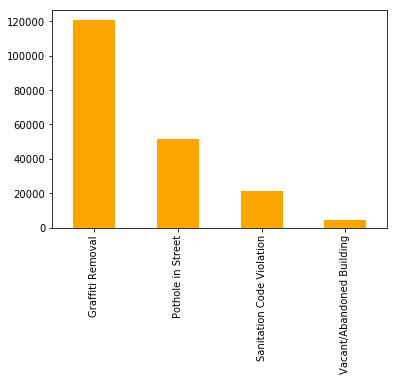

In [156]:
df['service request type'].value_counts().plot('bar',color = 'orange')
plt.figure()
plt.show()

In [178]:
1.2.2
# Total Complaints for the Top 5 Neighborhoods
df['community area'].value_counts().head(5)

24.0    11832
22.0     9862
58.0     6997
21.0     6469
31.0     5980
Name: community area, dtype: int64

In [179]:
# Pothole in Street Complaints for the Top 5 Neighborhoods
g_sub['community area'].value_counts().head(5)

24.0    9489
22.0    8125
58.0    6181
21.0    5577
31.0    5016
Name: community area, dtype: int64

In [180]:
# Sanitation Code Violation Complaints for the Top 5 Neighborhoods
p_sub['community area'].value_counts().head(5)

2.0     1603
24.0    1534
10.0    1495
15.0    1341
8.0     1310
Name: community area, dtype: int64

In [181]:
# Graffiti Removal Complaints for the Top 5 Neighborhoods
s_sub['community area'].value_counts().head(5)

7     809
25    788
24    773
22    731
49    659
Name: community area, dtype: int64

In [182]:
# Vacant/Abandoned Building Complaints for the Top 5 Neighborhoods
v_sub['community area'].value_counts().head(5)

67.0    453
68.0    316
49.0    297
71.0    280
61.0    249
Name: community area, dtype: int64

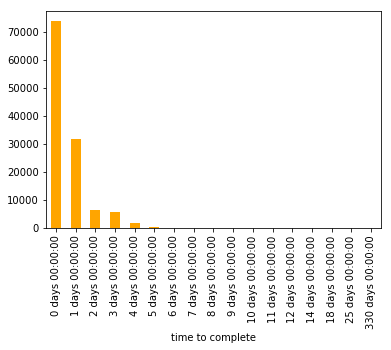

In [157]:
1.2.3
# Response time for Graffiti Removal
g_sub.groupby('time to complete').size().plot('bar', color = 'orange')
plt.figure()
plt.show()

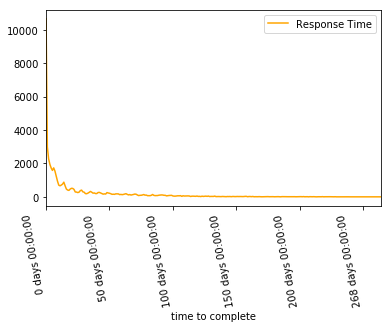

In [158]:
# Response time for Pothole in Street
p_sub.groupby('time to complete').size().to_frame().rename(columns={0:'Response Time'}).plot(rot=100,color = 'orange')
plt.show()

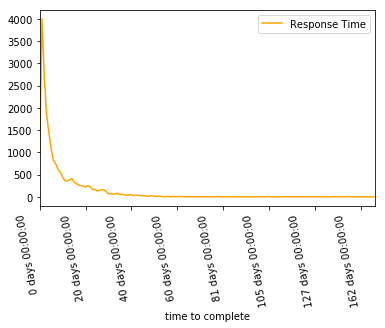

In [159]:
# Response time for Sanitation Code Violation
s_sub.groupby('time to complete').size().to_frame().rename(columns={0:'Response Time'}).plot(rot=100,color = 'orange')
plt.show()

In [174]:
1.2.4
# Summary for subtype of Graffiti Removal - 'what type of surface is the graffiti on?'
pd.DataFrame(g_sub['subtype'].value_counts())

,subtype
Metal - Painted,38311
Brick - Unpainted,22138
Brick - Painted,20365
"Cement (Sidewalk, Alley, Wall, Curb)",9257
Wood - Painted,7248
Metal - Unpainted,6119
Aluminum Siding,5040
Glass,2676
Other/Unknown Surface,2250
Vinyl Siding,2011


In [162]:
# Summary for subtype of Pothole in Street - 'most recent action'
pd.DataFrame(p_sub['subtype'].value_counts())

,subtype
Pothole Patched,31125
No Potholes Found,3530
Completed Upon Arrival,1479
Street Resurfaced,652
CDOT Pavement Cave-In Survey Transfer Outcome,317
WM Sewer Cave In Inspection Transfer Outcome,264
CDOT Alley Pot Hole Transfer Outcome,214
CDOT Inspect Public Way Survey Transfer Outcome,120
No Action - See Remarks in Description,114
No Such Address Found,43


In [164]:
# Summary for subtype of Sanitation Code Violation - 'what is the nature of this code violation?'
pd.DataFrame(s_sub['subtype'].value_counts())

,subtype
Other,8327
Garbage in yard,3812
Garbage in alley,2995
Overflowing carts,1627
Dumpster not being emptied,1574
Dog feces in yard,1150
Construction Site Cleanliness/Fence,859
Standing water,299
Graffiti Commercial Vehicle,26


In [165]:
# Summary for subtype of Vacant/Abandoned Building - 'location of building on the lot'
pd.DataFrame(v_sub['subtype'].value_counts())

,subtype
Front,3076
Rear,691
Garage,97


In [ ]:
### 1.3 Five Interesting Things Learnt from the Data
'''
(1) For the four types of complaints, community area 24 appears four times among the top 5 areas receiving most complaints, which is West Town.
    
(2) The completion time for the graffiti removal complaint is pretty short, nearly within 5 days. However, for the sanitation and pitholes complaints it could take months.
    
(3) In Chicago, people like drawing graffiti on the material of metal and brick.

(4) The number of graffiti complaints is larger than the sum of the other three types of complaints.

(5) There are a lot of vacant or abandoned buildings in the community area 67, 68 and 71, which are West Englewood, Englewood and Auburn Gresham.
'''

Problem 2: Data Augmentation and APIs

In [2]:
# Request FIPS from FCC API - https://www.fcc.gov/general/census-block-conversions-api

In [ ]:
import request

In [3]:
def find_blockID (lat, long):
    '''
    Given a coordiate, through FCC API, return corresponding digit numbers of the blockgroup and the tract
    
    Inputs:
        lat, long: float
        
    Outputs:
        (blockgroup, track): tuple
    '''
    fcc_url="http://data.fcc.gov/api/block/find?latitude="+str(lat)+"&longitude="+str(long)+"&showall=false&format=json"
    r = requests.get(fcc_url).json()
    code = r['Block']['FIPS']
    tract = code[5:-4]
    blockgroup = code[-4:-3]
    
    return (blockgroup, tract)

In [ ]:
# Get demographics information from census api - http://api.census.gov/data/2015/acs5/examples.html
# based on the blockgroup and tract
# demographics of interest - https://uscensusbureau.github.io/citysdk/developers/queryBuilder/
'''
    Family income in the past 12 months: B19101_001E
    Black population: B02009_001E
    White population: B02008_001E
    Asian population: B02011_001E
    Average household size = B25010_001E
'''
url = "http://api.census.gov/data/2015/acs5?get=NAME,B19101_001E,B02009_001E,B02008_001E,B25010_001E&for=block+group:*&in=state:17+county:031&in=tract:\
*&key=98479600102fe947c7b411e55d5c421f29f3bbf2"
j = requests.get(url).json()

In [ ]:
'''
For the limited data I have tried to access with the demographics attributes of family income, race and family size, 
here are the answers I come up for the Problem 2.
(1)For blocks with Vacant and Abandoned Buildings complaints, the family income is lower and the black population is a little
bit higer.
(2) 
(3) It does not change over the time with the limited data I collected within a short time.
(4) Blocks with Vacant and Abandoned Buildings complaints have a larger black population and a lower family income.
'''